In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

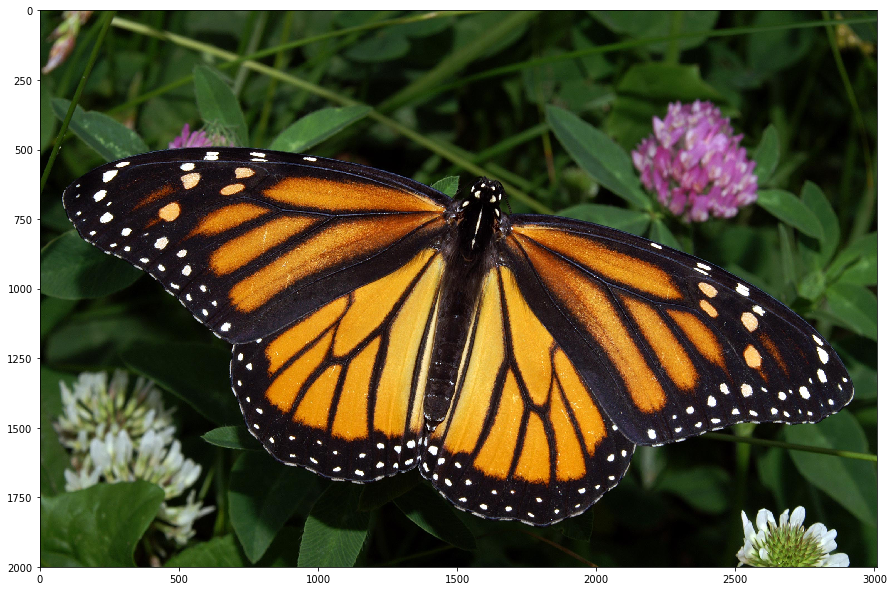

In [3]:
img = cv2.imread("images/monarch.jpg")

img_cp = np.copy(img)

img_cp = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.imshow(img_cp);

## Prepare data for k-means

In [6]:
pixel_vals = img_cp.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

## Implement k-means clustering

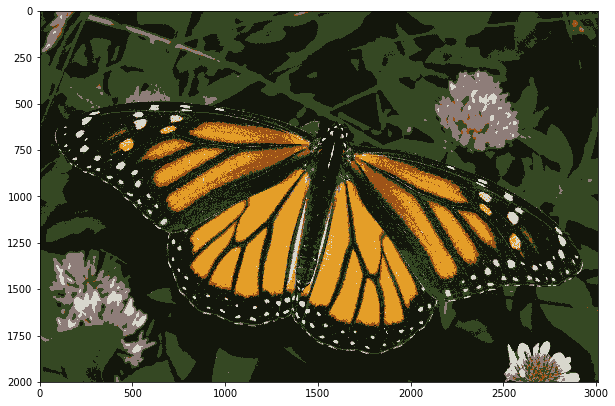

In [14]:
k = 6
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert into 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape
segmented_img = segmented_data.reshape((img_cp.shape))
labels_reshape = labels.reshape(img_cp.shape[0], img_cp.shape[1])

plt.figure(figsize=(10, 10))
plt.imshow(segmented_img);

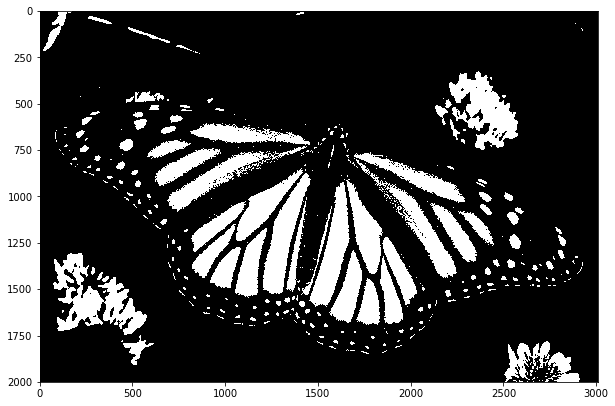

In [11]:
# Visualize one segment

plt.figure(figsize=(10, 10))
plt.imshow(labels_reshape==1, cmap="gray");

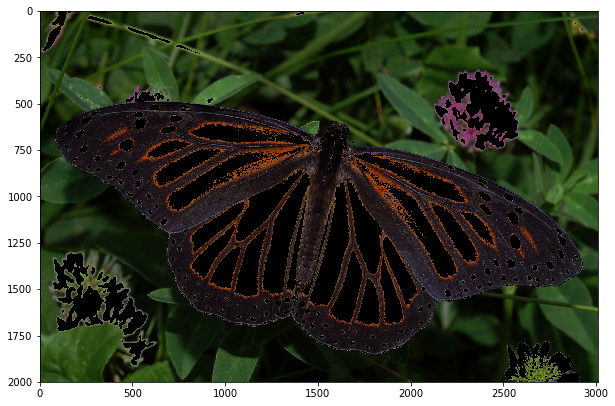

In [12]:
# Mask image segment

masked = np.copy(img_cp)

masked[labels_reshape==1] = [0, 0, 0]

plt.figure(figsize=(10, 10))
plt.imshow(masked);

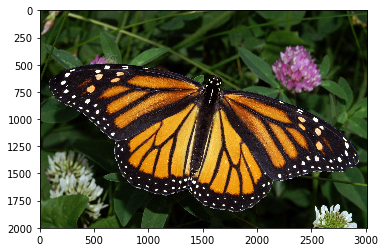

In [37]:
plt.imshow(img_cp)

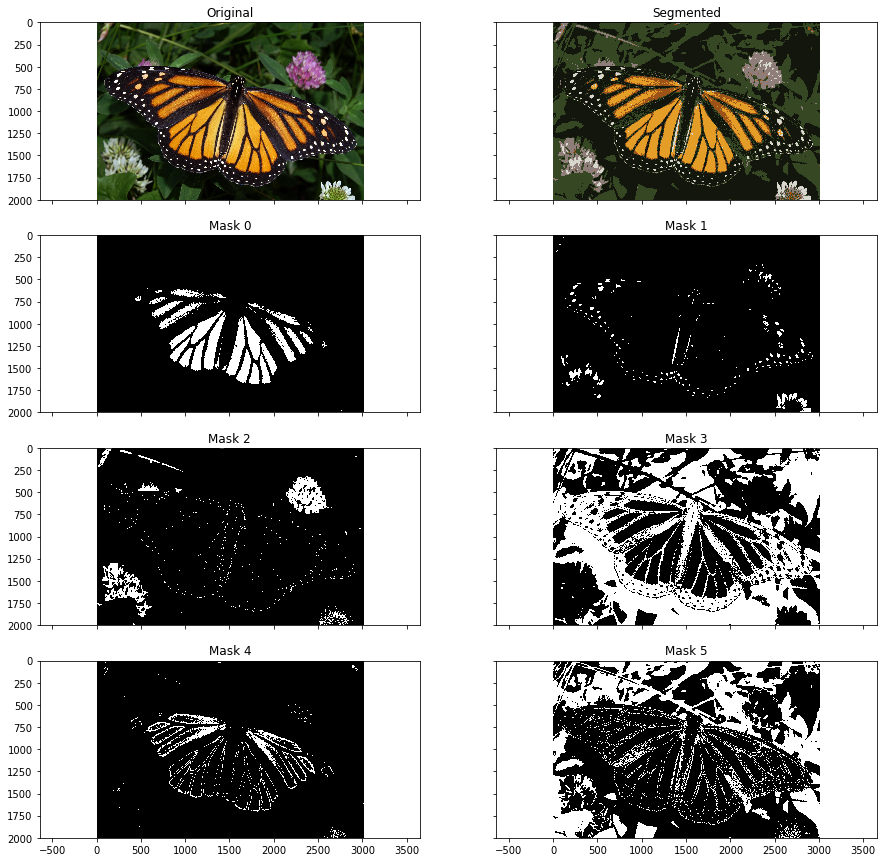

In [42]:
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 15))
        
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axs
cluster = 0
for idx, row in enumerate(axs):
    for idy, col in enumerate(row):
        if(idx == 0 and idy ==0):
            col.set_title("Original")
            col.imshow(img_cp)
        elif(idx == 0 and idy == 1):
            col.set_title("Segmented")
            col.imshow(segmented_img)
        else:
            masked = np.copy(img_cp)
            masked[labels_reshape==cluster] = [0, 0, 0]
            col.set_title("Mask {}".format(cluster))
            col.imshow(labels_reshape == cluster, cmap="gray");
            cluster += 1

